<a href="https://colab.research.google.com/github/elenakelly/Deep-Learning-Emotion-Detection/blob/main/DeepLearningCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import zipfile

In [2]:
#with zipfile.ZipFile("data/archive.zip","r") as zip_ref:
#    zip_ref.extractall("data")

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import os

In [6]:
train_data = 'drive/MyDrive/archive/train'
test_data = 'drive/MyDrive/archive/test'

In [7]:
train_data_generator = ImageDataGenerator(rescale=1./255, rotation_range=30,shear_range=0.3,zoom_range=0.3, horizontal_flip=True, fill_mode='nearest')
test_data_generator = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_data_generator.flow_from_directory(train_data, color_mode='grayscale',target_size=(48,48),batch_size=32,class_mode='categorical',shuffle=True)
test_generator = test_data_generator.flow_from_directory(test_data, color_mode='grayscale',target_size=(48,48),batch_size=32,class_mode='categorical',shuffle=True)

Found 28759 images belonging to 7 classes.
Found 7208 images belonging to 7 classes.


In [9]:
#Verify our generator by plotting a few faces and printing corresponding labels
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

img, label = train_generator.__next__()

In [10]:
import random

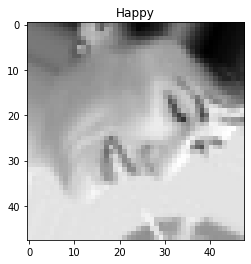

In [11]:
i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()

In [12]:
# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [13]:
train_path = "drive/MyDrive/archive/train/"
test_path = "drive/MyDrive/archive/test"

In [14]:
num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)
    
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

In [15]:
epochs=50

history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//32,
                epochs=epochs,
                validation_data=test_generator,
                validation_steps=num_test_imgs//32)

model.save('emotion_detection_model_100epochs.h5')

Epoch 1/50
898/898 [==============================] - 8263s 9s/step - loss: 1.7683 - accuracy: 0.2680 - val_loss: 1.6740 - val_accuracy: 0.3051
Epoch 2/50
898/898 [==============================] - 73s 82ms/step - loss: 1.6515 - accuracy: 0.3435 - val_loss: 1.4912 - val_accuracy: 0.4208
Epoch 3/50
898/898 [==============================] - 72s 80ms/step - loss: 1.5299 - accuracy: 0.4050 - val_loss: 1.3655 - val_accuracy: 0.4756
Epoch 4/50
898/898 [==============================] - 71s 79ms/step - loss: 1.4402 - accuracy: 0.4432 - val_loss: 1.2822 - val_accuracy: 0.5097
Epoch 5/50
898/898 [==============================] - 73s 81ms/step - loss: 1.3902 - accuracy: 0.4650 - val_loss: 1.2360 - val_accuracy: 0.5326
Epoch 6/50
898/898 [==============================] - 72s 80ms/step - loss: 1.3499 - accuracy: 0.4829 - val_loss: 1.2151 - val_accuracy: 0.5368
Epoch 7/50
898/898 [==============================] - 71s 79ms/step - loss: 1.3223 - accuracy: 0.4913 - val_loss: 1.1759 - val_accuracy:

In [20]:
acc = history.history['accuracy']
#acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

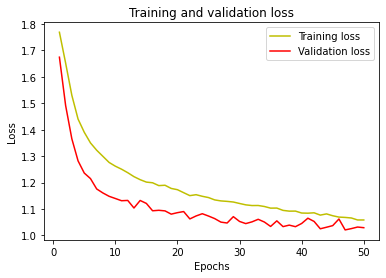

In [21]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

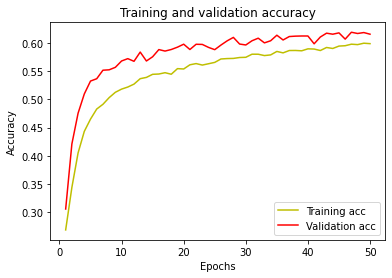

In [22]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
from keras.models import load_model

In [24]:
#Test the model
my_model = load_model('emotion_detection_model_100epochs.h5', compile=False)


In [26]:

#Generate a batch of images
test_img, test_lbl = test_generator.__next__()
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

In [27]:
from sklearn import metrics

In [28]:
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

Accuracy =  0.71875


In [29]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

In [30]:
cm = confusion_matrix(test_labels, predictions)
#print(cm)

In [31]:
import seaborn as sns

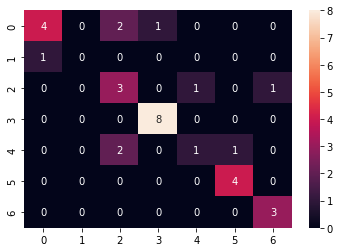

In [32]:
sns.heatmap(cm, annot=True)

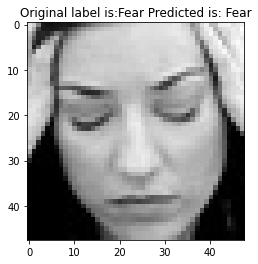

In [33]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()